# Walmart Sales Analysis

## Data loading

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('walmart_cleaned.csv')
#print(df.head())

df = pd.DataFrame(df)

## Inspect data structure
This dataset contains 17 columns and 421,570 rows.<br>
The "Date" column is of type "object", while all other columns are of "numeric" type.<br>
The "IsHoliday" column is a dummy variable where 1 indicates a holiday, and 0 indicates a non-holiday.<br>
There are no missing values in the dataset.<br>

In [185]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

## Detect and treat outliers
To identify outliers in the numeric columns of the dataset, I used Box Plot and Z-Score methods.
Since visualizing all numeric columns in a single Box Plot is impractical, I generated separate Box Plots for each numeric column. Outliers were identified in the following columns: Weekly_Sales, Temperature, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, and Unemployment.<br>
<br>
The results from Z-score also confirmed the fingdings about outliers. I checked the numbers of rows in each numeric columns, where the abslute value of Z-socre is greater than 3. The results show that "Unemployment" has the 13,756 rows are considered as outlier, "Weekly_Sales" is the second highest column in terms of outliers.<br>
<br>
Please note: "IsHoliday" column has 29,661 rows with absolute value of Z-score greater than 3. However, "IsHoliday" is a dummy variable, these are not considered outliers.
Given the large number of outliers, I chose to retain them in the analysis. These outliers could offer valuable insights into the dataset.


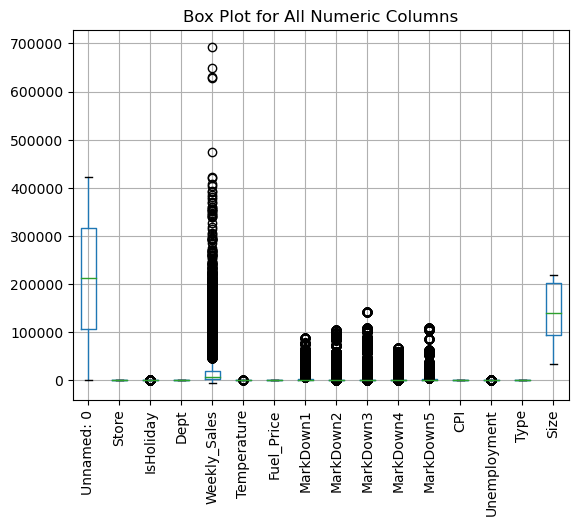

In [186]:
# Box plot for all numeric columns
df.boxplot()
plt.title("Box Plot for All Numeric Columns")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if necessary
plt.show()

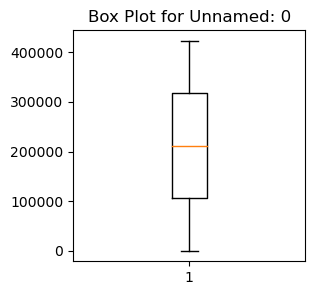

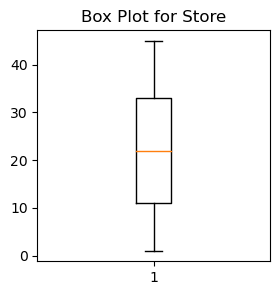

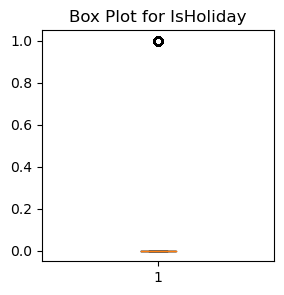

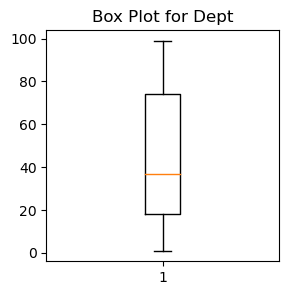

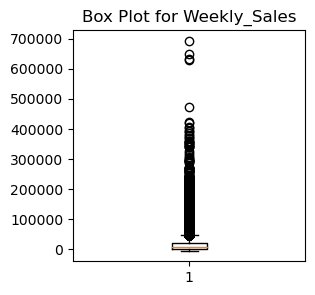

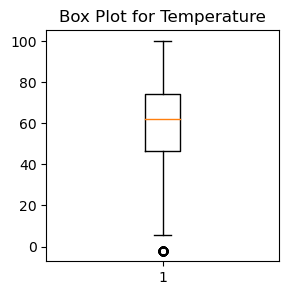

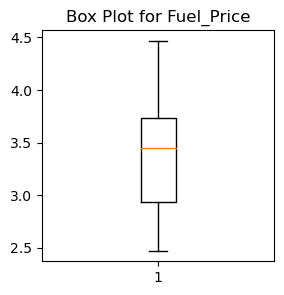

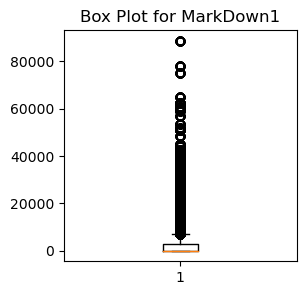

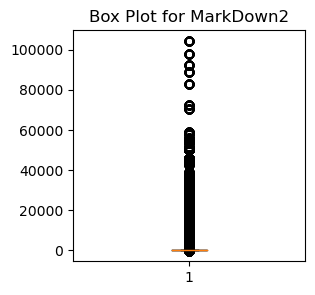

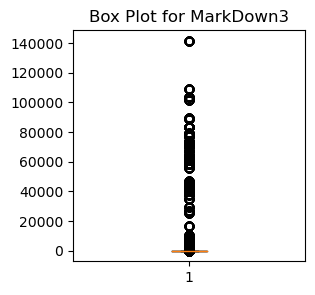

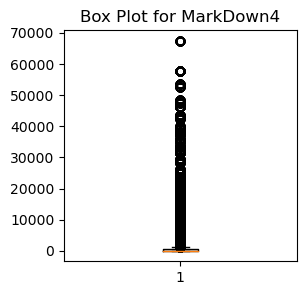

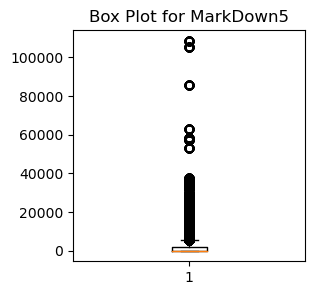

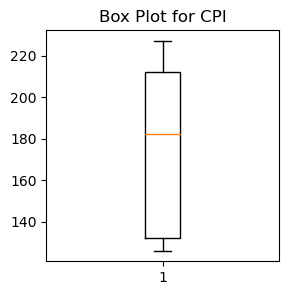

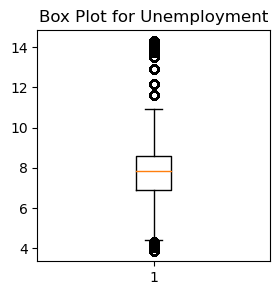

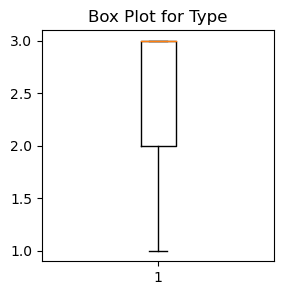

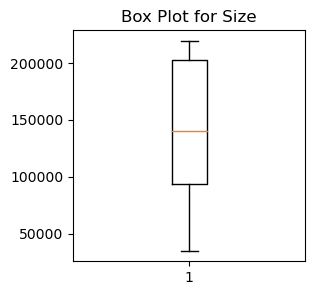

In [187]:
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [188]:
import pandas as pd
from scipy.stats import zscore

# Apply zscore to numeric columns only
numeric_columns = df.select_dtypes(include=['number'])
df_zscores = numeric_columns.apply(zscore)

print(df_zscores)

        Unnamed: 0     Store  IsHoliday      Dept  Weekly_Sales  Temperature  \
0        -1.731751 -1.658199  -0.275106 -1.418742      0.393782    -0.963798   
1        -1.731743 -1.658199  -0.275106 -0.598856     -0.186875    -0.963798   
2        -1.731735 -1.658199  -0.275106 -0.894015     -0.121416    -0.963798   
3        -1.731726 -1.658199  -0.275106  0.024258     -0.702026    -0.963798   
4        -1.731718 -1.658199  -0.275106 -0.533265     -0.655888    -0.963798   
...            ...       ...        ...       ...           ...          ...   
421565    1.732229  1.783258  -0.275106 -1.025197      0.451711    -0.067219   
421566    1.732237  1.783258  -0.275106 -0.926810     -0.586550    -0.067219   
421567    1.732245  1.783258  -0.275106 -0.402083     -0.521758    -0.067219   
421568    1.732253  1.783258  -0.275106  1.270486     -0.672068    -0.067219   
421569    1.732261  1.783258  -0.275106  1.762418     -0.656262    -0.067219   

        Fuel_Price  MarkDown1  MarkDown

In [189]:
# Count rows where |Z| > 3 for each column
outlier_counts = (df_zscores.abs() > 3).sum()
print("Number of rows with |Z| > 3 for each column:")
print(outlier_counts)

Number of rows with |Z| > 3 for each column:
Unnamed: 0          0
Store               0
IsHoliday       29661
Dept                0
Weekly_Sales     8848
Temperature        69
Fuel_Price          0
MarkDown1        8723
MarkDown2        5655
MarkDown3        2773
MarkDown4        6731
MarkDown5        5455
CPI                 0
Unemployment    13756
Type                0
Size                0
dtype: int64


## Aggregate sales data by time periods (weekly and monthly) and by categories (store and department)
### Weekly Sales:
The weekly sales were aggregated (summed) by store and then averaged across all stores.
The average weekly sales per store is \\$1.05 million, including all departments.
Using a similar approach, the average weekly sales per department across all stores is \\$0.6 million.
### Monthly Sales:
The same method was applied to aggregate monthly sales by store and department.
The average monthly sales per store is \\$4.5 million, including all departments.
The average monthly sales per department across all stores is \\$2.5 million.

In [190]:
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True) 
    
def Aggregate (df, groupbycol='Store', col='Weekly_Sales', resample='W', print1='The average store weekly sales is:'):
    # Aggregate by week
    df1 = (df.groupby([groupbycol])[col].resample(resample).sum().reset_index())
    #print(df1)
    df2 = df1[col].mean()
    print(f"{print1} {df2}.")

Aggregate(
    df,
    groupbycol='Store',
    col='Weekly_Sales',
    resample='W',
    print1='The average store weekly sales is:'        
)

The average store weekly sales is: 1046964.8775617715.


In [191]:
Aggregate(
    df,
    groupbycol='Dept',
    col='Weekly_Sales',
    resample='W',
    print1='The average department weekly sales is:'        
)

The average department weekly sales is: 584472.8886188949.


In [192]:
Aggregate(
    df,
    groupbycol='Store',
    col='Weekly_Sales',
    resample='M',
    print1='The average store monthly sales is:'        
)

The average store monthly sales is: 4536847.802767676.


In [193]:
Aggregate(
    df,
    groupbycol='Dept',
    col='Weekly_Sales',
    resample='M',
    print1='The average department monthly sales is:'        
)

The average department monthly sales is: 2529935.781866316.


## Exploratory Data Analysis (EDA)

### Line plots for sales trends (weekly and monthly)
### Weekly sales line plot:
The weekly sales line plot is constructed with weeks on the x-axis and total weekly sales on the y-axis.
Total weekly sales are calculated by summing up all weekly sales across stores and departments.
The plot shows noticeable peaks at the end of 2010 and throughout 2011, indicating the presence of seasonality in the dataset.
### Monthly sales line plot:
The monthly sales line plot is constructed with months on the x-axis and total monthly sales on the y-axis.
Total monthly sales are calculated in a similar manner to weekly sales but at the monthly level.
The seasonal pattern becomes more evident in the monthly sales plot, with clear peaks in May, August, and January.

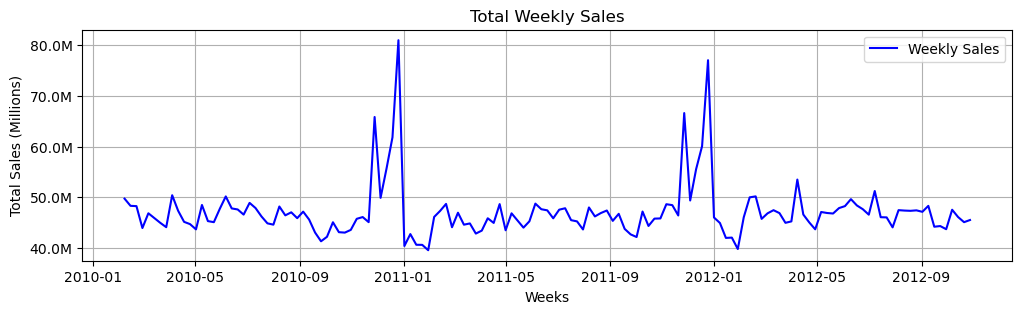

In [194]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_trend(df, date_col, sales_col, resample_freq='W', agg_func='sum', figure_size=(10, 4), 
                      title='Weekly Sales', label='Weekly Sales', x_label='Date', y_label='Sales (Millions)'):
    
    df = df.reset_index()
    
    # Aggregate sales based on resample frequency
    aggregated_sales = df.set_index(date_col).resample(resample_freq)[sales_col].agg(agg_func)

    # Create the plot
    plt.figure(figsize=figure_size)
    plt.plot(aggregated_sales.index, aggregated_sales.values, color='blue', label=label)

    # Format y-axis as millions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

    # Add labels, title, and legend
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

plot_trend(
    df,
    date_col='Date',
    sales_col='Weekly_Sales',
    resample_freq='W',
    agg_func='sum',
    figure_size=(12, 3),
    title='Total Weekly Sales',
    label='Weekly Sales',
    x_label='Weeks',
    y_label='Total Sales (Millions)'
)

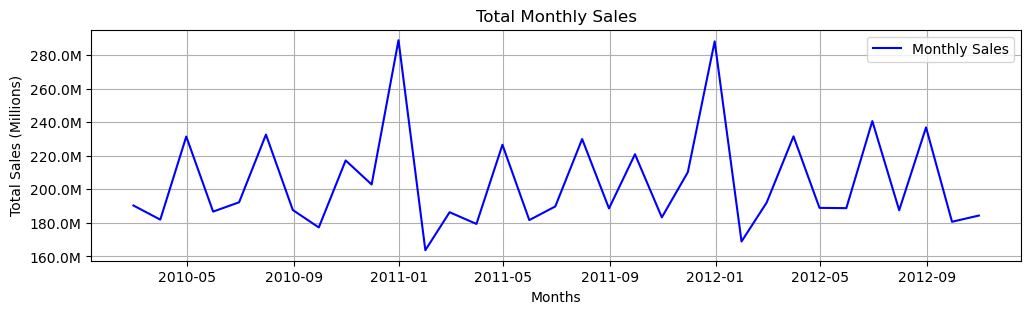

In [195]:
plot_trend(
    df,
    date_col='Date',
    sales_col='Weekly_Sales',
    resample_freq='M',
    agg_func='sum',
    figure_size=(12, 3),
    title='Total Monthly Sales',
    label='Monthly Sales',
    x_label='Months',
    y_label='Total Sales (Millions)'
)

## Compare sales in holiday vs. non-holiday weeks
The impact of holiday on weekly sales (combining all stores and departments) is approximately 7.31% ((170365 / 15901) - 1 *100). The average weekly sales during holiday week is \\$17,036, compared to \\$15,901 for non-holiday week. This numbers are derived using groupby function plus mean option.<br>
<br>
To provide a clearer visual comparison, a bar chart was created to display the average weekly sales for holiday vs. non-holiday weeks.

In [196]:
# Aggregate sales by holiday and non-holiday weeks
sales_summary = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
sales_summary['IsHoliday'] = sales_summary['IsHoliday'].map({1: 'Holiday', 0: 'Non-Holiday'})
print(sales_summary)

     IsHoliday  Weekly_Sales
0  Non-Holiday  15901.445069
1      Holiday  17035.823187


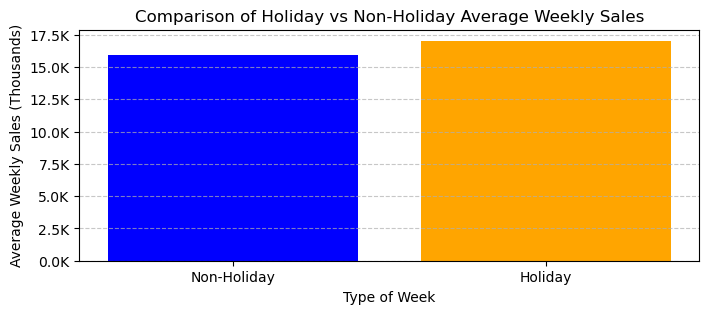

In [197]:
# Bar chart to compare sales
plt.figure(figsize=(8, 3))
plt.bar(sales_summary['IsHoliday'], sales_summary['Weekly_Sales'], color=['blue', 'orange'])

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000:.1f}K'))

plt.title('Comparison of Holiday vs Non-Holiday Average Weekly Sales')
plt.xlabel('Type of Week')
plt.ylabel('Average Weekly Sales (Thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Rank the top 10 stores and departments based on total sales
The top 10 stores and top 10 departments were identified by summing the weekly sales over the entire observation period and sorting the total sales in descending order. The results are visualized using bar charts. Store number 20 ranks as the top-performing store, while department number 92 ranks as the highest-performing department.

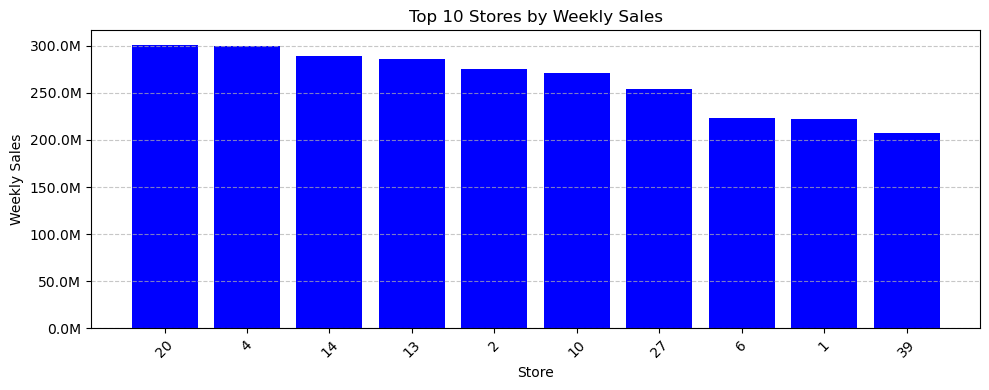

In [198]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_top_n_aggregated(df, groupby_column, value_column, top_n=10, y_formatter=lambda x: f'{x:.1f}M',
                          title="Top N Aggregated Data", xlabel="Category", ylabel="Value", figsize=(10, 4)):
    
    # Convert column from float64 to int64
    df[groupby_column] = df[groupby_column].astype('int64')
    
    # Aggregate and sort
    aggregated = df.groupby(groupby_column)[value_column].sum().reset_index()
    top_n_values = aggregated.sort_values(by=value_column, ascending=False).head(top_n)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.bar(top_n_values[groupby_column].astype(str), top_n_values[value_column], color='blue')
    
    # Format y-axis
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: y_formatter(x)))
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_top_n_aggregated(df, 
                      groupby_column='Store', 
                      value_column='Weekly_Sales', 
                      top_n=10,
                      y_formatter=lambda x: f'{x / 1_000_000:.1f}M',
                      title="Top 10 Stores by Weekly Sales", 
                      xlabel="Store", 
                      ylabel="Weekly Sales")


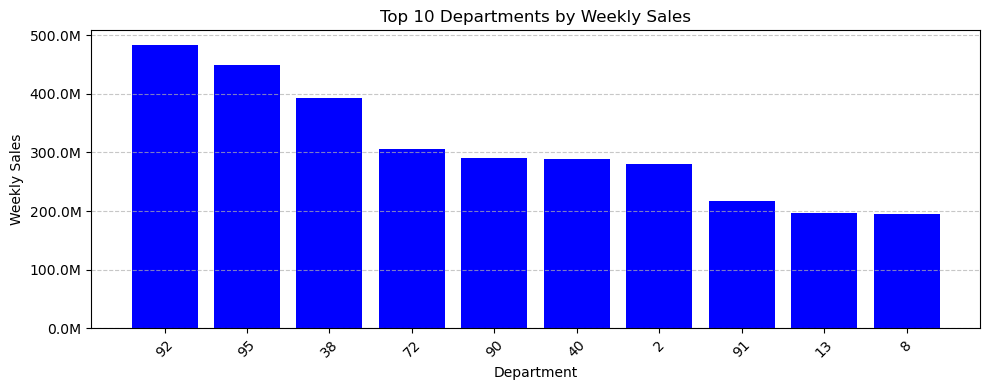

In [199]:
plot_top_n_aggregated(df, 
                      groupby_column='Dept', 
                      value_column='Weekly_Sales', 
                      top_n=10,
                      y_formatter=lambda x: f'{x / 1_000_000:.1f}M',
                      title="Top 10 Departments by Weekly Sales", 
                      xlabel="Department", 
                      ylabel="Weekly Sales")

## Identify sparse time series with irregular data
Several line plots were created to analyze the average weekly values of the following variables: Temperature, Fuel Price, MarkDown1 to 5, CPI, Unemployment Rate, and Size.<br>
<br>
Temperature:<br>
The temperature line plot follows an expected seasonal pattern, averaging around 80°F in summer and 30°F in winter.<br>
<br>
Fuel price:<br>
The line plot for fuel prices shows an upward trend, indicating an increase in fuel prices over the observed period. Two peak points are noticeable in May 2011 and May 2012.<br>
<br>
MarkDown variables (1-5):<br>
All MarkDown values were zero before October/November 2011, suggesting that MarkDown activity began after this period. Peaks are observed around January 2012 for all MarkDowns. MarkDown2 and MarkDown3 were active for shorter periods compared to MarkDown1, MarkDown4, and MarkDown5.<br>
<br>
CPI:<br>
The CPI line plot displays an upward trend, indicating a rise in inflation during the observed period.<br>
<br>
Unemployment rate:<br>
The unemployment rate shows a downward trend, starting above 8.5% in early 2010 and declining to below 7% by the end of 2012.<br>
<br>
Size:<br>
The size variable, representing the size of Walmart stores, also shows a downward trend, implying Walmart downsized its stores during the observation period. A scatter plot comparing Type vs. Size confirms that the size variable provides similar information as the type variable.

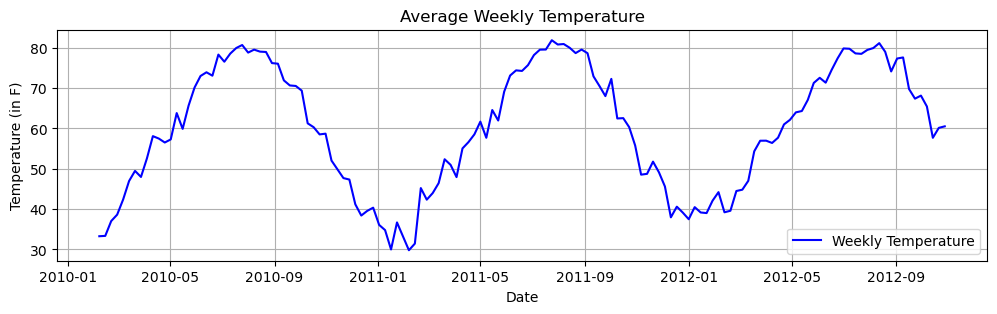

In [200]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_trend_w_option(df, date_col, sales_col, resample_freq='W', agg_func='sum', figure_size=(10, 4),
               y_formatter=lambda x: f'{x:.1f}M', title='Weekly Sales',
                label='Weekly Sales', x_label='Date', y_label='Sales (Millions)'):
    
    df = df.reset_index()
    
    # Aggregate sales based on resample frequency
    aggregated_sales = df.set_index(date_col).resample(resample_freq)[sales_col].agg(agg_func)

    # Create the plot
    plt.figure(figsize=figure_size)
    plt.plot(aggregated_sales.index, aggregated_sales.values, color='blue', label=label)

    # Format y-axis as millions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: y_formatter(x)))

    # Add labels, title, and legend
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
    
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='Temperature',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x:.0f}',
    title='Average Weekly Temperature',
    label='Weekly Temperature',
    x_label='Date',
    y_label='Temperature (in F)'
)

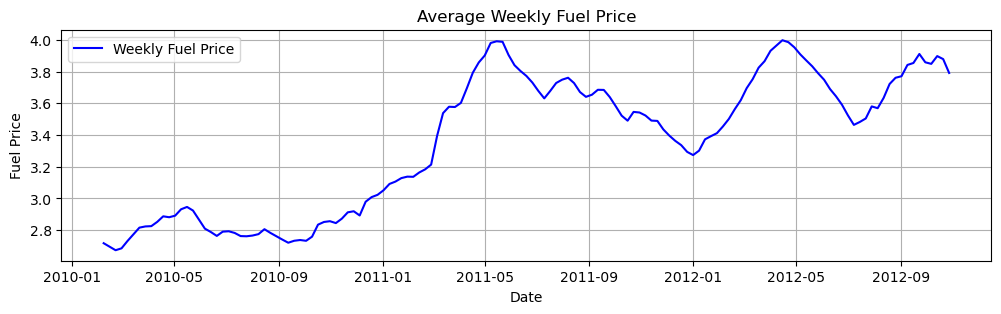

In [201]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='Fuel_Price',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x:.1f}',
    title='Average Weekly Fuel Price',
    label='Weekly Fuel Price',
    x_label='Date',
    y_label='Fuel Price'
)

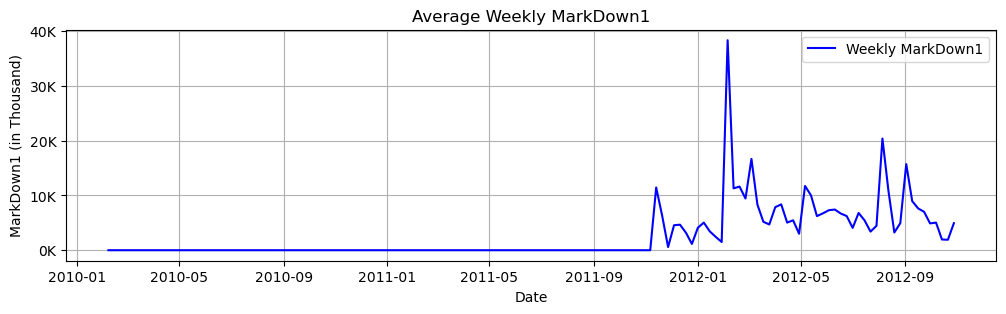

In [202]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='MarkDown1',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x / 1_000:.0f}K',
    title='Average Weekly MarkDown1',
    label='Weekly MarkDown1',
    x_label='Date',
    y_label='MarkDown1 (in Thousand)'
)

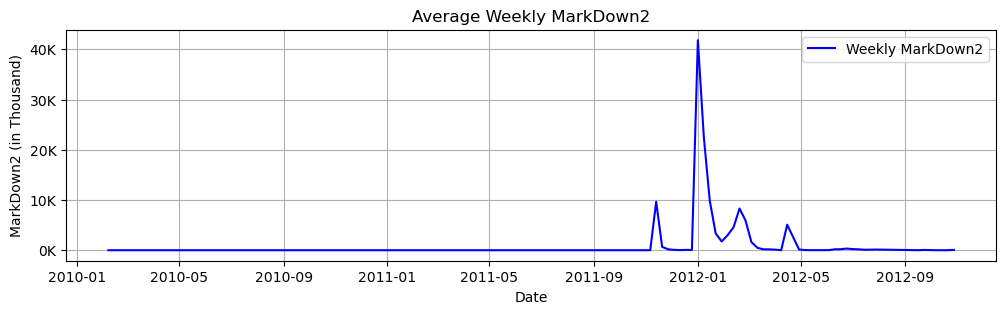

In [203]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='MarkDown2',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x / 1_000:.0f}K',
    title='Average Weekly MarkDown2',
    label='Weekly MarkDown2',
    x_label='Date',
    y_label='MarkDown2 (in Thousand)'
)

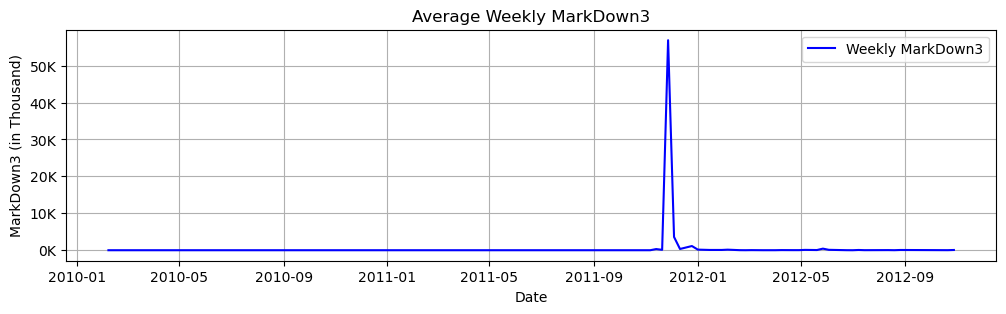

In [204]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='MarkDown3',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x / 1_000:.0f}K',
    title='Average Weekly MarkDown3',
    label='Weekly MarkDown3',
    x_label='Date',
    y_label='MarkDown3 (in Thousand)'
)

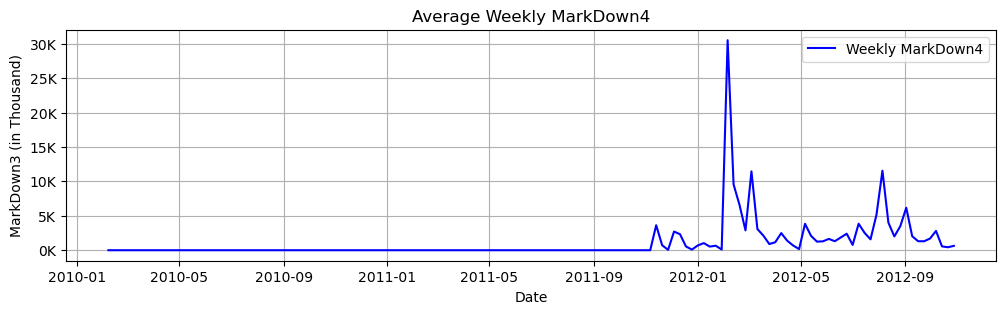

In [205]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='MarkDown4',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x / 1_000:.0f}K',
    title='Average Weekly MarkDown4',
    label='Weekly MarkDown4',
    x_label='Date',
    y_label='MarkDown3 (in Thousand)'
)

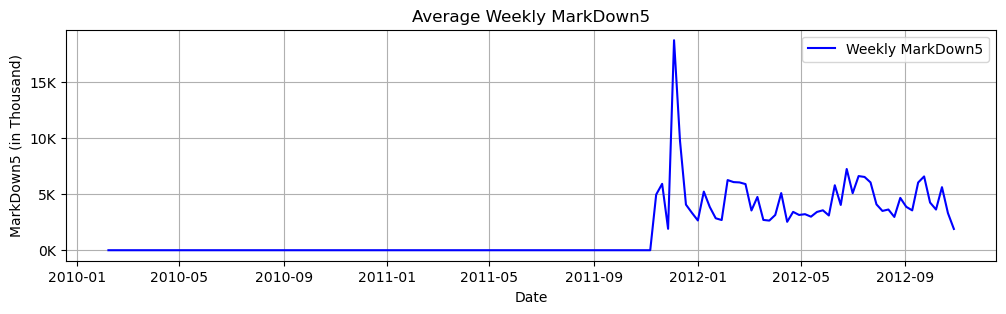

In [206]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='MarkDown5',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x / 1_000:.0f}K',
    title='Average Weekly MarkDown5',
    label='Weekly MarkDown5',
    x_label='Date',
    y_label='MarkDown5 (in Thousand)'
)

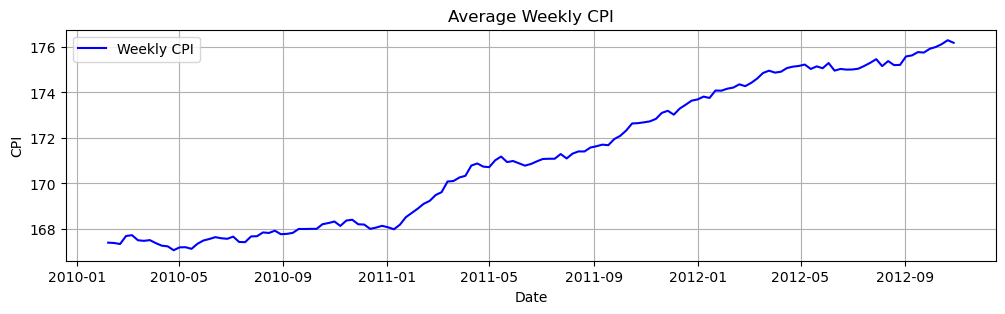

In [207]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='CPI',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x:.0f}',
    title='Average Weekly CPI',
    label='Weekly CPI',
    x_label='Date',
    y_label='CPI'
)

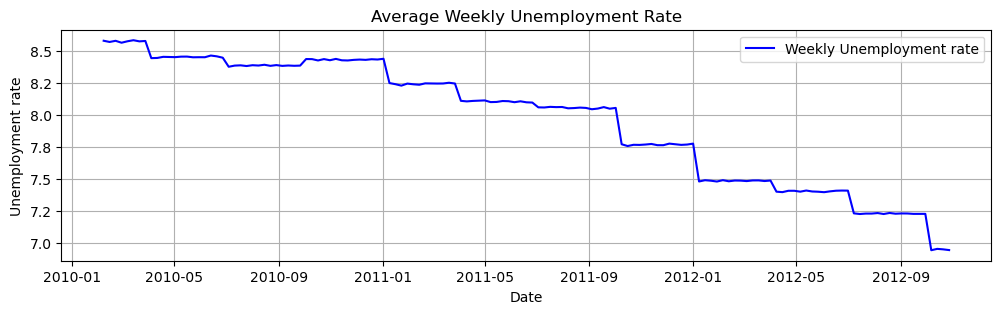

In [208]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='Unemployment',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x:.1f}',
    title='Average Weekly Unemployment Rate',
    label='Weekly Unemployment rate',
    x_label='Date',
    y_label='Unemployment rate'
)

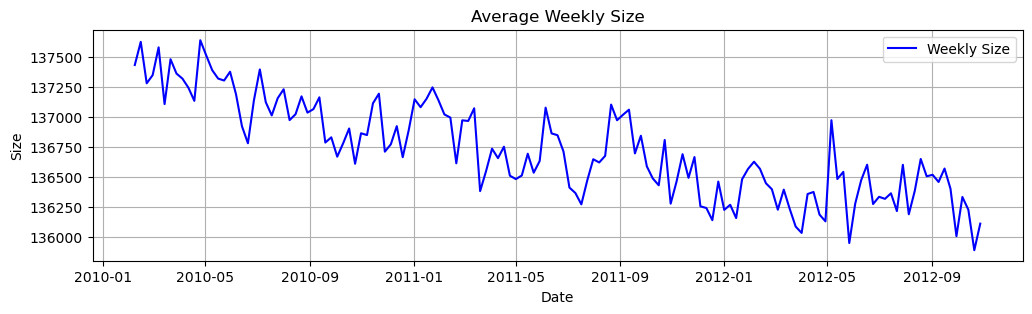

In [209]:
plot_trend_w_option(
    df,
    date_col='Date',
    sales_col='Size',
    resample_freq='W',
    agg_func='mean',
    figure_size=(12, 3),
    y_formatter=lambda x: f'{x:.0f}',
    title='Average Weekly Size',
    label='Weekly Size',
    x_label='Date',
    y_label='Size'
)

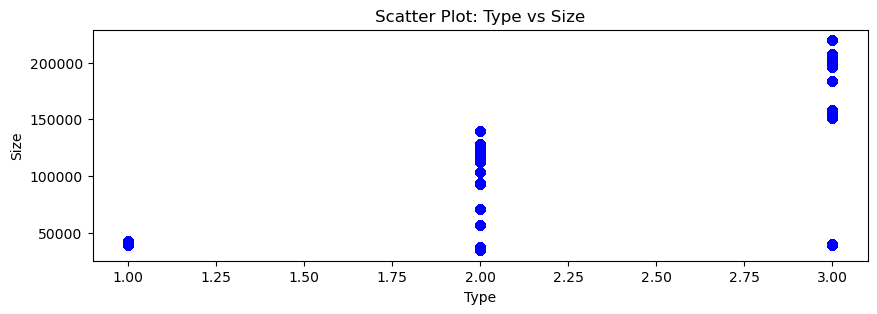

In [210]:
plt.figure(figsize=(10, 3))
plt.scatter(df['Type'], df['Size'], color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot: Type vs Size')
plt.xlabel('Type')
plt.ylabel('Size')

# Show the plot
plt.show()

## Perform correlation analysis to explore relationship between sales and external factors
A correlation heatmap was created to examine the relationships among all variables. Overall, most variables exhibit low correlations with weekly sales. The highest correlation is observed between Weekly Sales and Type, with a value of 0.24. Interestingly, despite the estimated 7.31% impact of holidays on weekly sales, the correlation between IsHoliday and Weekly Sales is only 0.01.

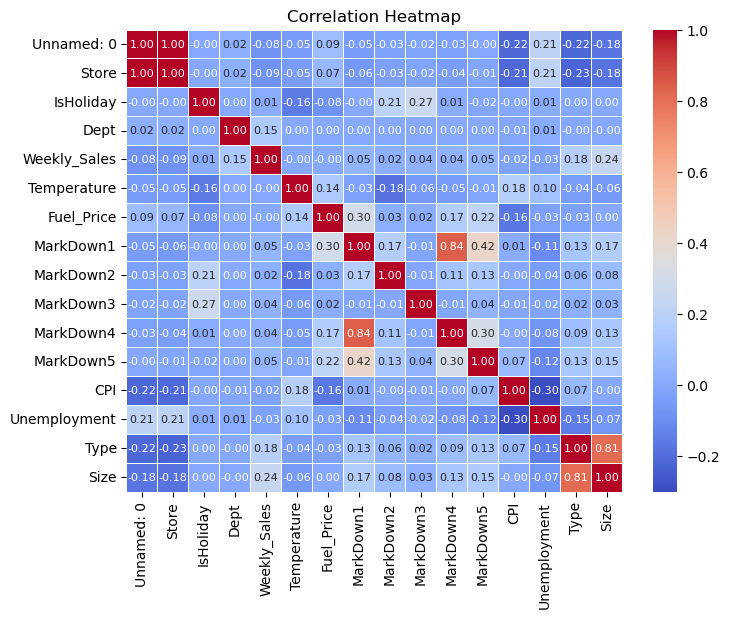

In [211]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Optional: Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

## Data Visualization

## YOY stack charts to visualize year-over-year sales trends
I aggregated weekly sales to the monthly level across all stores and departments, using both a line plot and a parallel bar chart to visualize year-over-year sales trends. Monthly sales, rather than yearly sales, are presented because the dataset does not contain a full 12 months of data for 2010 and 2012.<br>
<br>
The line plot shows that monthly sales in 2010 and 2011 follow a similar pattern when compared to monthly sales in 2012. The bar chart also reflects these trends but with less visual clarity compared to the line plot. To confirm these observations, a correlation heatmap was used to examine the correlation between monthly sales across years. However, since 2010 and 2012 lack complete yearly data, the analysis includes only the months from February to October for all three years.<br>
<br>
The correlation between monthly sales in 2010 and 2011 is 0.56, suggesting a moderate positive relationship. The correlation between monthly sales in 2010 and 2012 is -0.39, indicating a negative relationship. These results suggest that Walmart might have experienced structural changes in the market during 2012.

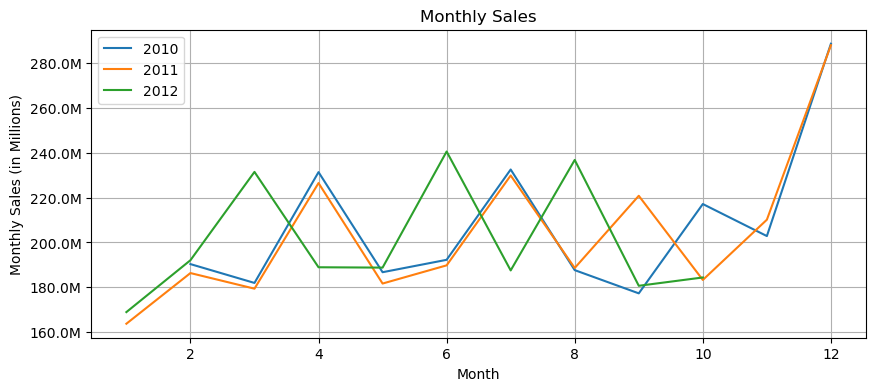

In [212]:
m_sales = df.resample('M')['Weekly_Sales'].sum()

m_sales = m_sales.reset_index()

m_sales['Year'] = m_sales['Date'].dt.year
m_sales['Month'] = m_sales['Date'].dt.month

sales_2010=m_sales[(m_sales['Year']==2010)]
sales_2011=m_sales[(m_sales['Year']==2011)]
sales_2012=m_sales[(m_sales['Year']==2012)]

plt.figure(figsize=(10, 4))
plt.plot(sales_2010['Month'], sales_2010['Weekly_Sales'], label='2010')
plt.plot(sales_2011['Month'], sales_2011['Weekly_Sales'], label='2011')
plt.plot(sales_2012['Month'], sales_2012['Weekly_Sales'], label='2012')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Monthly Sales (in Millions)')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
merged_df = pd.merge(sales_2010, sales_2011, on='Month', how='right')
merged_df = pd.merge(merged_df, sales_2012, on='Month', how='left')

merged_df.rename(columns={'Date_x': 'Date_2010',
                          'Weekly_Sales_x': 'monthly_sales_2010',
                          'Date_y': 'Date_2011',
                          'Weekly_Sales_y': 'monthly_sales_2011',
                          'Date': 'Date_2012',
                          'Weekly_Sales': 'monthly_sales_2012',
                         }, inplace=True)
print(merged_df.head())

   Date_2010  monthly_sales_2010  Year_x  Month  Date_2011  \
0        NaT                 NaN     NaN      1 2011-01-31   
1 2010-02-28        1.903330e+08  2010.0      2 2011-02-28   
2 2010-03-31        1.819198e+08  2010.0      3 2011-03-31   
3 2010-04-30        2.314124e+08  2010.0      4 2011-04-30   
4 2010-05-31        1.867109e+08  2010.0      5 2011-05-31   

   monthly_sales_2011  Year_y  Date_2012  monthly_sales_2012    Year  
0        1.637040e+08    2011 2012-01-31        1.688945e+08  2012.0  
1        1.863313e+08    2011 2012-02-29        1.920636e+08  2012.0  
2        1.793564e+08    2011 2012-03-31        2.315097e+08  2012.0  
3        2.265265e+08    2011 2012-04-30        1.889209e+08  2012.0  
4        1.816482e+08    2011 2012-05-31        1.887665e+08  2012.0  


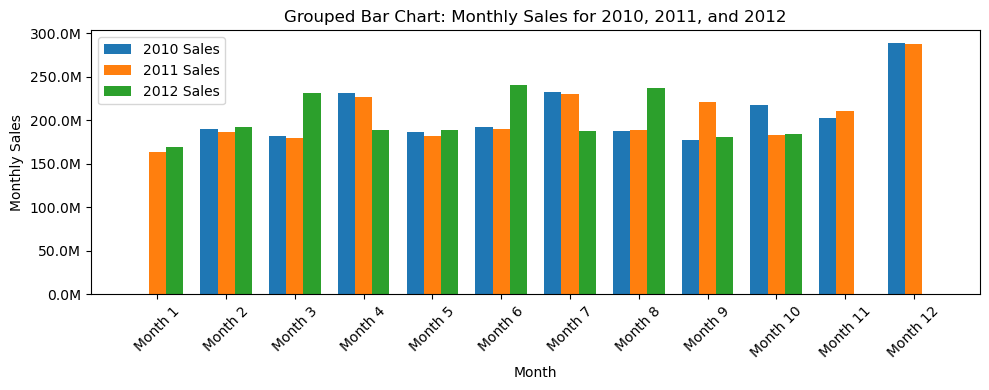

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure NaN values are replaced with 0 for plotting
merged_df['monthly_sales_2010'] = merged_df['monthly_sales_2010'].fillna(0)
merged_df['monthly_sales_2011'] = merged_df['monthly_sales_2011'].fillna(0)
merged_df['monthly_sales_2012'] = merged_df['monthly_sales_2012'].fillna(0)

# Prepare data
months = merged_df['Month']
sales_x = merged_df['monthly_sales_2010']
sales_y = merged_df['monthly_sales_2011']
sales_na = merged_df['monthly_sales_2012']

# Define bar positions
x = np.arange(len(months))  # Numerical positions for months
width = 0.25  # Width of each bar

# Plot bars
plt.figure(figsize=(10, 4))
plt.bar(x - width, sales_x, width=width, label='2010 Sales')
plt.bar(x, sales_y, width=width, label='2011 Sales')
plt.bar(x + width, sales_na, width=width, label='2012 Sales')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

# Customize the chart
plt.xticks(x, [f'Month {int(m)}' for m in months], rotation=45)
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Grouped Bar Chart: Monthly Sales for 2010, 2011, and 2012')
plt.legend()

plt.tight_layout()
plt.show()

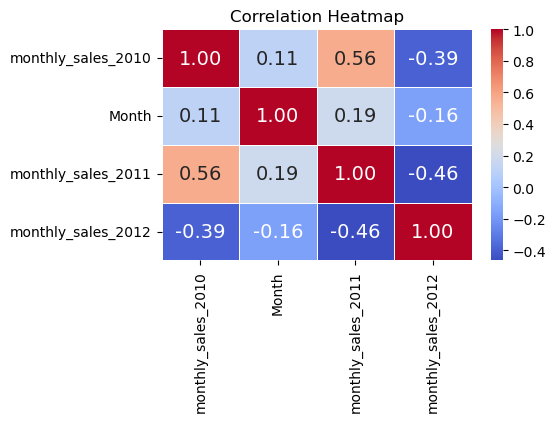

In [215]:
# Filter rows where Month is in specific values
filtered = merged_df[merged_df['Month'].isin([2,3, 4,5,6,7,8,9,10])]
#print(filtered)

filtered = filtered.drop(['Date_2010','Year_x','Date_2011','Year_y','Date_2012','Year'], axis=1)

# Calculate correlation matrix
corr_ = filtered.corr()

# Create the heatmap
plt.figure(figsize=(5, 3))  # Optional: Set figure size
sns.heatmap(corr_, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 14})

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

## Scatter plot to analyze  relationships
Scatter plots for various variables against weekly sales are presented in this section. The findings align with the results from the correlation heatmap, showing no strong relationship between the observed variables and weekly sales.

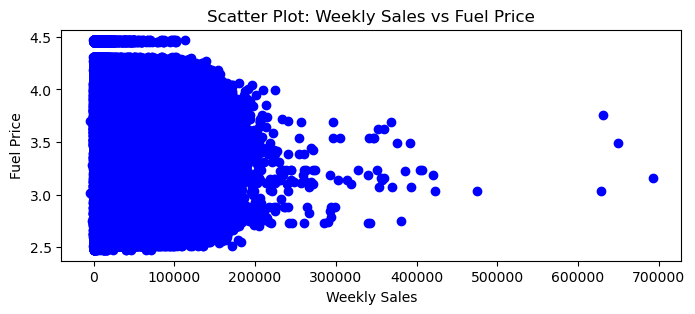

In [216]:
def scatter_plot (df, col1, col2, title, xlabel, ylabel):
    plt.figure(figsize=(8, 3))
    plt.scatter(df[col1], df[col2], color='blue', marker='o')

    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()
    
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'Fuel_Price',
    title = 'Scatter Plot: Weekly Sales vs Fuel Price',
    xlabel = 'Weekly Sales',
    ylabel = 'Fuel Price'
)

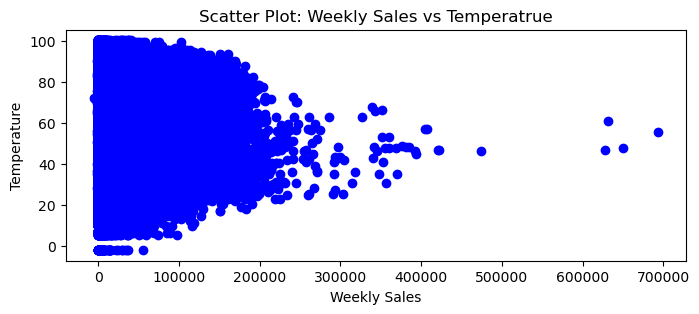

In [217]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'Temperature',
    title = 'Scatter Plot: Weekly Sales vs Temperatrue',
    xlabel = 'Weekly Sales',
    ylabel = 'Temperature'
)

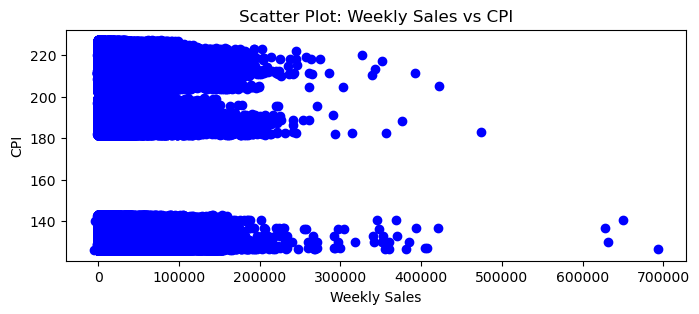

In [218]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'CPI',
    title = 'Scatter Plot: Weekly Sales vs CPI',
    xlabel = 'Weekly Sales',
    ylabel = 'CPI'
)

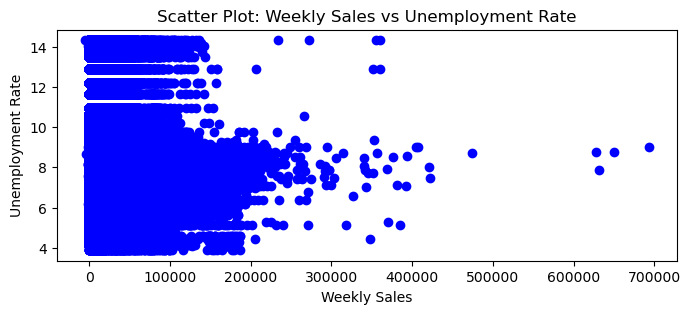

In [219]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'Unemployment',
    title = 'Scatter Plot: Weekly Sales vs Unemployment Rate',
    xlabel = 'Weekly Sales',
    ylabel = 'Unemployment Rate'
)

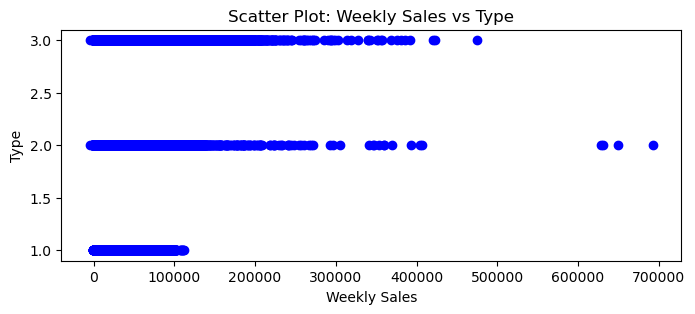

In [220]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'Type',
    title = 'Scatter Plot: Weekly Sales vs Type',
    xlabel = 'Weekly Sales',
    ylabel = 'Type'
)

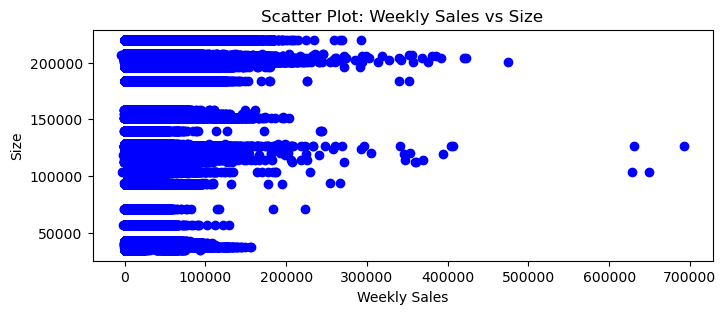

In [221]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'Size',
    title = 'Scatter Plot: Weekly Sales vs Size',
    xlabel = 'Weekly Sales',
    ylabel = 'Size'
)

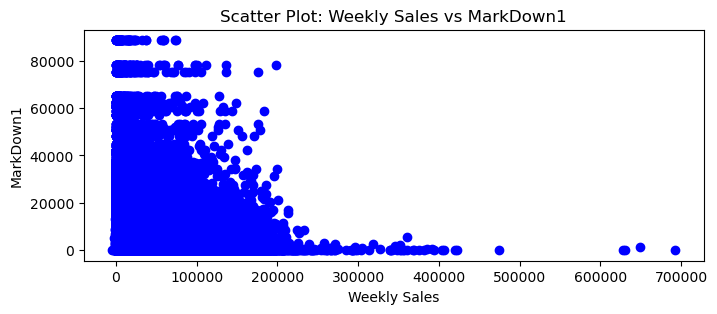

In [222]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'MarkDown1',
    title = 'Scatter Plot: Weekly Sales vs MarkDown1',
    xlabel = 'Weekly Sales',
    ylabel = 'MarkDown1'
)

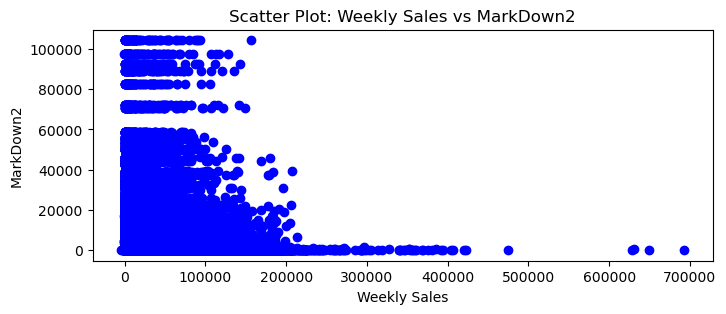

In [223]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'MarkDown2',
    title = 'Scatter Plot: Weekly Sales vs MarkDown2',
    xlabel = 'Weekly Sales',
    ylabel = 'MarkDown2'
)

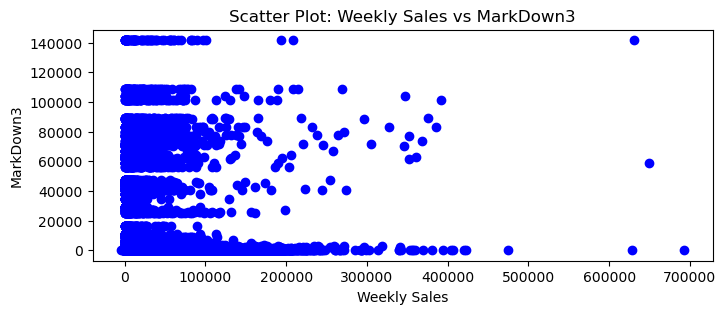

In [224]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'MarkDown3',
    title = 'Scatter Plot: Weekly Sales vs MarkDown3',
    xlabel = 'Weekly Sales',
    ylabel = 'MarkDown3'
)

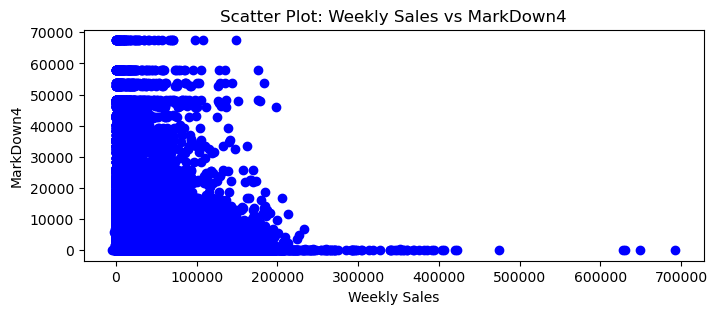

In [225]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'MarkDown4',
    title = 'Scatter Plot: Weekly Sales vs MarkDown4',
    xlabel = 'Weekly Sales',
    ylabel = 'MarkDown4'
)

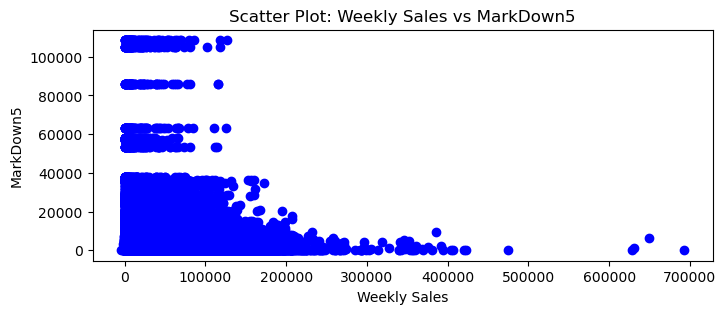

In [226]:
scatter_plot(
    df,
    col1 = 'Weekly_Sales',
    col2 = 'MarkDown5',
    title = 'Scatter Plot: Weekly Sales vs MarkDown5',
    xlabel = 'Weekly Sales',
    ylabel = 'MarkDown5'
)

## Key insights

### Actionable Insights:
Sales trends:<br>
Walmart does not exhibit a clear upward or downward trend in sales during the observation period. However, seasonality is evident from line plots. Seasonal sales peaks are observed in May, August, and toward the end of the fourth quarter.
<br>
<br>
Holiday impacts:<br>
The data reveals that holidays impact Walmart's sales, with sales increasing by approximately 7.31% during holiday weeks compared to non-holiday weeks. 
<br>
<br>
Performance rankings:<br>
The top 10 stores and top 10 departments were identified based on their total weekly sales:<br>
Top 10 stores are store number: 20, 4, 14, 13, 2, 10, 27,6 ,1 and 39. <br>
Top 10 departments are department number: 92, 95, 38, 72, 90, 40, 2, 91, 13 and 8. <br>
Sales from the top 10 stores account for 39% of Walmart's total sales (\\$2.63B / \\$6.74B *100), which is significant given the dataset includes only 45 stores. The rankings for the top departments within the top 10 stores are consistent with the overall top 10 department rankings, confirming their performance across locations.
### Recommendations:
The results indicate that Walmart relies heavily on sales from the top 10 stores and top 10 departments. As such, ensuring smooth operations in these top-performing stores and maintaining adequate inventory levels for the top-performing departments should be a primary focus for Walmart.
<br>
<br>
The data also suggests that Walmart has a tendency to scale down the size of its stores. However, the size of a store shows a weak positive correlation with sales, indicating that larger stores generate more sales. Walmart may need to reconsider its strategy regarding store size to maximize sales potential.
<br>
<br>
External factors such as temperature, fuel price, CPI, and unemployment rate do not have significant impacts on Walmart’s business performance. However, seasonality is evident in the data. To optimize inventory and revenue, Walmart should stock up inventory before May, August, and the last quarter of the year, when seasonal sales peaks are observed.

In [227]:
def top_n_aggregated(df, groupby_column, value_column, top_n=10):
    
    # Convert column from float64 to int64
    df[groupby_column] = df[groupby_column].astype('int64')
    
    # Aggregate and sort
    aggregated = df.groupby(groupby_column)[value_column].sum().reset_index()
    top_n_values = aggregated.sort_values(by=value_column, ascending=False).head(top_n)
    return top_n_values
    
top_n = top_n_aggregated(df, 'Store', 'Weekly_Sales', top_n=10)
print(top_n)

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


In [228]:
aggregated1 = top_n['Weekly_Sales'].sum()
print("Top 10 stores total weekly sales:", aggregated1)

aggregated2 = df['Weekly_Sales'].sum()
print("Total weekly sales:", aggregated2)

Top 10 stores total weekly sales: 2630919914.6899996
Total weekly sales: 6737218987.110002


In [229]:
def top_dep_in_store (store_number=2, head=5):
    # Filter rows where the 'Store' column matches any value in the selected_values list
    filtered_stores = df[df['Store'].isin([store_number])]
    aggregated_dept = filtered_stores.groupby('Dept')['Weekly_Sales'].sum().reset_index()
    aggregated_dept['Store'] = store_number
    top_dept = aggregated_dept.sort_values(by='Weekly_Sales', ascending=False).head(head)
    return top_dept
    
df_20 = top_dep_in_store (store_number=20, head=10)
df_4 = top_dep_in_store (store_number=4, head=10)
df_14 = top_dep_in_store (store_number=14, head=10)
df_13 = top_dep_in_store (store_number=13, head=10)
df_2 = top_dep_in_store (store_number=2, head=10)

datasets = [df_20, df_4, df_14, df_13, df_2]

for i, df in enumerate(datasets, 1):
    print(f"Dataset {i}:")
    print(df)
    print("\n")

Dataset 1:
    Dept  Weekly_Sales  Store
70    92   23542625.04     20
73    95   21537795.62     20
36    38   15759345.93     20
68    90   13707777.99     20
57    72   13154550.44     20
37    40   12372193.76     20
69    91   11224526.19     20
1      2   11189928.74     20
7      8   10931643.76     20
72    94    9030211.90     20


Dataset 2:
    Dept  Weekly_Sales  Store
70    92   22789210.43      4
73    95   21054815.74      4
57    72   14477956.47      4
1      2   13390422.10      4
68    90   12762602.07      4
36    38   11453434.29      4
38    40   11258284.62      4
12    13    9952291.97      4
72    94    9746752.24      4
71    93    9697568.31      4


Dataset 3:
    Dept  Weekly_Sales  Store
69    92   26101497.71     14
72    95   20655911.35     14
67    90   15325988.39     14
35    38   14780483.91     14
56    72   13462139.10     14
68    91   13071120.15     14
1      2   11111794.69     14
36    40   10346973.93     14
71    94    9229386.69     14
70 

In [230]:
# Chaining merges
result = df_20.merge(df_4, on='Dept', how='inner').merge(df_14, on='Dept', how='inner').merge(df_13, on='Dept', how='inner').merge(df_2, on='Dept', how='inner')

print(result)

   Dept  Weekly_Sales_x  Store_x  Weekly_Sales_y  Store_y  Weekly_Sales_x  \
0    92     23542625.04       20     22789210.43        4     26101497.71   
1    95     21537795.62       20     21054815.74        4     20655911.35   
2    38     15759345.93       20     11453434.29        4     14780483.91   
3    90     13707777.99       20     12762602.07        4     15325988.39   
4    72     13154550.44       20     14477956.47        4     13462139.10   
5    40     12372193.76       20     11258284.62        4     10346973.93   
6     2     11189928.74       20     13390422.10        4     11111794.69   
7    94      9030211.90       20      9746752.24        4      9229386.69   

   Store_x  Weekly_Sales_y  Store_y  Weekly_Sales  Store  
0       14     23170876.20       13   23572153.03      2  
1       14     19568811.27       13   20533191.52      2  
2       14     11938483.10       13   12171444.43      2  
3       14     16529671.45       13   13958449.81      2  
4       14 

C:\Users\4984724\AppData\Local\Temp\ipykernel_7336\70675164.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Store_x', 'Weekly_Sales_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = df_20.merge(df_4, on='Dept', how='inner').merge(df_14, on='Dept', how='inner').merge(df_13, on='Dept', how='inner').merge(df_2, on='Dept', how='inner')
